<a href="https://colab.research.google.com/github/teazaw/MAT422-Mathematical-Methods-in-Data-Science/blob/main/HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1.2.1 Linear Spaces**

**Linear spaces** are sets where any linear combination of vectors remains within the set.

Therefore, we can assert that a given set is a linear space if its elements can be multiplied by scalars and added together, and that the results of these algebraic operations are elements that still belong to the set.

The **span** of a set of vectors {V1,V2,..., Vn} in a vector space V is the set of all vectors that can be expressed as linear combinations of the given vectors.

A **linear subspace** of V is a subset U ⊆ V that is closed under vector addition and scalar multiplication.


*   0 is always a linear subspace.
*   A span of a set of vectors is a linear subspace.



In [3]:
import numpy as np
horizontal_vector = np.array([3, 6, 9])
print("Horizontal Vector")
print(horizontal_vector)

Horizontal Vector
[3 6 9]


In [43]:
import numpy as np
from numpy.linalg import lstsq

def are_vectors_in_span(vectors_to_check, basis_vectors):
    A = np.column_stack(basis_vectors)
    return [np.allclose(A @ lstsq(A, vector, rcond=None)[0], vector)
            for vector in vectors_to_check]

basis_vectors = [np.array([1, 0, 0]), np.array([0, 1, 0])]
vectors_to_check = [np.array([2, 3, 0]), np.array([1, 1, 1]), np.array([0, 0, 0])]

results = are_vectors_in_span(vectors_to_check, basis_vectors)

print("Basis Vectors: [1,0,0] & [0,1,0]" )
for vector, result in zip(vectors_to_check, results):
    print(f"Vector {vector} is in the span of the basis vectors (linear subspace): {result}")


Basis Vectors: [1,0,0] & [0,1,0]
Vector [2 3 0] is in the span of the basis vectors (linear subspace): True
Vector [1 1 1] is in the span of the basis vectors (linear subspace): False
Vector [0 0 0] is in the span of the basis vectors (linear subspace): True


# **1.2.2 Orthogonality**
**Orthogonality** is the concept of vectors being perpendicular to each other. Two vectors are orthogonal if their dot product is zero.

In [45]:
import numpy as np

def are_orthogonal(v1, v2):
    dot_product = np.dot(v1, v2)
    return dot_product == 0

v1 = np.array([1, 2])
v2 = np.array([-2, 1])
v3= np.array([6,9])

result1 = are_orthogonal(v1, v2)
result2 = are_orthogonal(v1, v3)
print("[1,2] and [-2,1] are orthogonal:", result1)
print("[1,2] and [6,9] are orthogonal:", result2)


[1,2] and [-2,1] are orthogonal: True
[1,2] and [6,9] are orthogonal: False


A set of vectors is **orthonormal** if every vector in the set has magnitude 1 and the set of vectors are mutually orthogonal.

In [49]:
import numpy as np
from numpy.linalg import norm

def compute_magnitude(vectors):
    magnitudes = [norm(vector) for vector in vectors]
    return magnitudes

v1 = np.array([1, 2])
v2 = np.array([-2,1])


vectors = [v1, v2]
magnitudes = compute_magnitude(vectors)

print("Magnitudes of the vectors:", magnitudes)

Magnitudes of the vectors: [2.23606797749979, 2.23606797749979]


Therefore, in the above examples, we can assert that the vectors [1,2] and [-2,1] are orthogonal but not orthonormal because their magnitudes do not equal 1.

# **1.2.3 Gram-Schmidt Process**

The **Gram-Schmidt process** is a way of transforming a set of linearly independent vectors into a set of orthonormal vectors that span the same space as the original set.

In [7]:
import numpy as np
from numpy.linalg import norm


def gram_schmidt(vectors):
   orthonormal_vectors = []
   for v in vectors:
        w = v - sum(np.dot(u, v) * u for u in orthonormal_vectors)
        vector_norm = norm(w)
        orthonormal_vectors.append(w / vector_norm)
   return orthonormal_vectors


v1 = np.array([1, 1])
v2 = np.array([1, -1])
vectors = [v1, v2]

print("Original Vectors: [1,1] & [1,-1]")
orthonormal_vectors = gram_schmidt(vectors)
print("Orthonormal vectors:")
for vec in orthonormal_vectors:
    print(vec)

def are_orthogonal(vectors):
   num_vectors = len(vectors)
   for i in range(num_vectors):
        for j in range(i + 1, num_vectors):
            dot_product = np.dot(vectors[i], vectors[j])
            if dot_product == 0:
              return True
   return False

result=are_orthogonal(orthonormal_vectors)
print("The transformed vectors are orthogonal:", result)

def compute_magnitude(vectors):
    magnitudes = [norm(vector) for vector in vectors]
    return magnitudes

magnitudes = compute_magnitude(orthonormal_vectors)
round_mag=list(map(round, magnitudes))

print("Magnitudes of the vectors:", round_mag)


Original Vectors: [1,1] & [1,-1]
Orthonormal vectors:
[0.70710678 0.70710678]
[ 0.70710678 -0.70710678]
The transformed vectors are orthogonal: True
Magnitudes of the vectors: [1, 1]


# **1.2.4 Eigenvalues and Eigenvectors**
An **eigenvalue** of a matrix A is a scalar λ such that there is a non-zero vector v that satisfies the following equation: **Av=λv**

The vector v is an eigenvector.

To compute eigenvalues, we must solve the equation: **det(A−λI)=0**

Here, *det* is the determinant and *I* is the identity matrix.  λ are the eigenvalues.

In [8]:
import numpy as np
from numpy.linalg import eig

def get_eigenvalues(matrix):
    eigenvalues, eigenvectors = eig(matrix)
    return eigenvalues

matrix = np.array([[0,2],[2, 3]])
eigenvalues = get_eigenvalues(matrix)

print("Original Matrix:")
print(matrix)
print("Computed Eigenvalues:")
print(eigenvalues)


Original Matrix:
[[0 2]
 [2 3]]
Computed Eigenvalues:
[-1.  4.]


To compute eigenvectors, solve the equation: **(A−λI)v=0**

The eigenvector is designated by v.

In [53]:
import numpy as np
from numpy.linalg import eig

def get_eigenvectors(matrix):
    eigenvalues, eigenvectors = eig(matrix)
    return eigenvectors

matrix = np.array([[0,2],[2, 3]])
eigenvectors = get_eigenvectors(matrix)


print("Original Matrix:")
print(matrix)
print("Computed Eigenvectors:")
print(eigenvectors)


Original Matrix:
[[0 2]
 [2 3]]
Computed Eigenvectors:
[[-0.89442719 -0.4472136 ]
 [ 0.4472136  -0.89442719]]


**The Spectral Theorem for Symmetric Matrices** states that an *n x n* symmetric matrix A has the following properties:
*   A has *n* real eigenvalues, counting multiplicites.
*   If *λ* is an eigenvalues of A with multiplicity *k*, then the eigenspace for λ is *k*-dimensional.
*   The eigenspaces are mututally orthogonal.
*   A is orthogonally diagnalizable.

We can represent A as 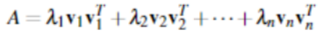


This is referrred to as the **spectral decomposition** of A.
